In [1]:
from openvino.inference_engine import IENetwork, IEPlugin
from caffe_classes import class_names
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)

image = cv2.imread('./images/llama.jpeg')
img = cv2.resize(image.astype(np.float32), (227, 227))
img -= imagenet_mean
img = img.reshape((1, 227, 227, 3))
img = img.transpose((0, 3, 1, 2)) 

In [4]:
model_xml_CPU = 'lrmodels/FP32/frozen_alexnet_model.xml'
model_bin_CPU = os.path.splitext(model_xml_CPU)[0] + ".bin"

model_xml_MYRIAD = 'lrmodels/FP16/frozen_alexnet_model.xml'
model_bin_MYRIAD = os.path.splitext(model_xml_MYRIAD)[0] + ".bin"

plugin = IEPlugin(device='CPU')
net = IENetwork(model=model_xml_CPU, weights=model_bin_CPU)
net.batch_size = 1
input_blob = next(iter(net.inputs))
exec_net = plugin.load(network=net)
outputs = exec_net.infer(inputs={input_blob: img})

Text(0.5, 1.0, 'Class: llama, probability: 0.8966')

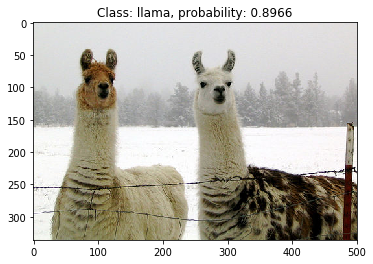

In [6]:
class_name = class_names[np.argmax(outputs['prob'])]
probs = outputs['prob'][0, np.argmax(outputs['prob'])]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Class: " + class_name + ", probability: %.4f" %probs)